In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

Rsol = 6.9599e10   # cm
Msol = 1.989e33    # g
G    = 6.672320e-8 # cm^3 g^-1 g^-2 Constantes Fisicas
kB = 1.380649e-16 #  erg K^−1
mH   = 1.6735575e-24 # g
mu = 0.61

rR = []            # Inicializar listas
c = []
rho = []
p = []
gamma1 = []
T = []

with open('data.txt','r') as f: # Leer archivo datos
    lines = f.readlines()
    for i in range(5,2487):
        temp = lines[i].split(" ")
        rR.append(float(temp[1]))
        c.append(float(temp[2]))
        rho.append(float(temp[3]))
        p.append(float(temp[4]))
        gamma1.append(float(temp[6]))
        T.append(float(temp[7]))
    f.close()
    lines = [0]

rR.reverse()                     # Invertir listas
c.reverse()
rho.reverse()
p.reverse()
gamma1.reverse()
T.reverse()

n = len(rR)
integrando = np.zeros(n)

for j in range(n):
    integrando[j] = p[j]*(rR[j]**2)
integraln = integrate.trapezoid(integrando[0:2402], x=rR[0:2402]) # el rango de integracion es de 0 - 1 porque
                                                                  # la distancia esta normalizada, se integra con trapecios
energia = 12*np.pi*(Rsol**3)*integraln
print('La magnitud de la energia potencial gravitacional es:',energia,'erg') # resultado en unidades ERG

q = (Rsol*energia)/(G*(Msol)**2)
print('El valor de q es:',q) # resultado en unidades ERG

La magnitud de la energia potencial gravitacional es: 6.121175017064436e+48 erg
El valor de q es: 1.6139547854663685


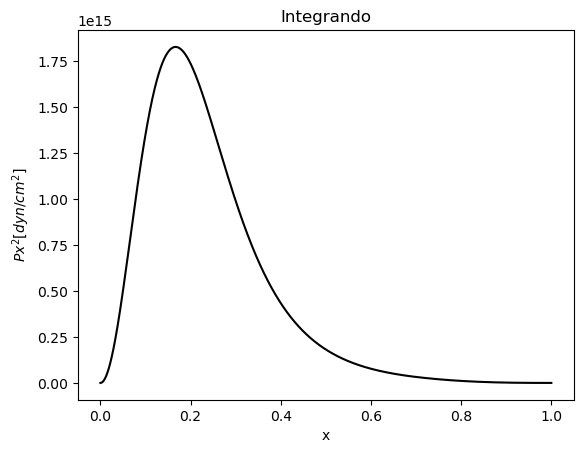

In [11]:
plt.plot(rR[0:2402],integrando[0:2402],color="black")
plt.xlabel(r'x')
plt.ylabel(r'$P x^2[dyn/cm^2]$')
plt.title('Integrando')
plt.show()

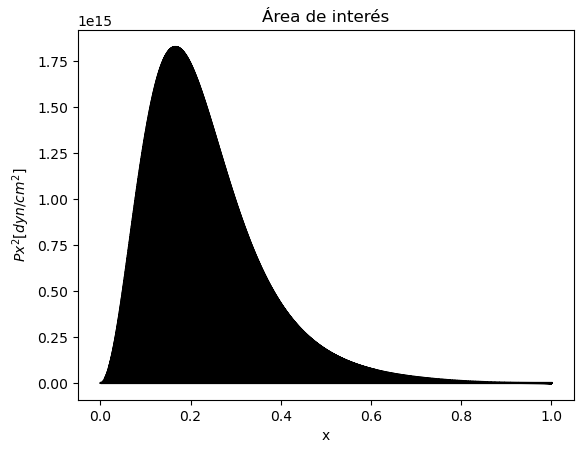

In [12]:
plt.fill_between(rR[0:2402],integrando[0:2402], step="pre", alpha=1,color="black")
plt.plot(rR[0:2402],integrando[0:2402],color="black", drawstyle="steps")
plt.xlabel(r'x')
plt.ylabel(r'$P x^2[dyn/cm^2]$')
plt.title('Área de interés')
plt.show()

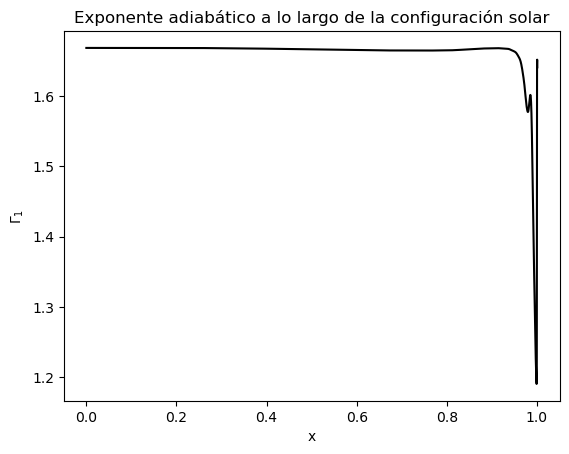

In [13]:
plt.plot(rR,gamma1,color="black")
plt.xlabel(r'x')
plt.ylabel(r'$\Gamma_1$')
plt.title('Exponente adiabático a lo largo de la configuración solar')
plt.show()

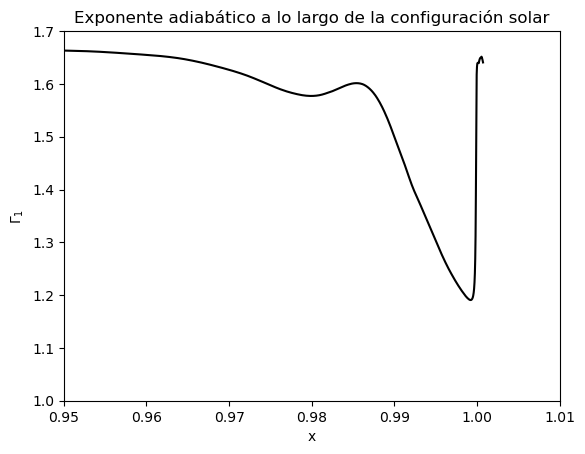

In [14]:
plt.plot(rR,gamma1,color="black")
plt.xlabel(r'x')
plt.ylabel(r'$\Gamma_1$')
plt.title('Exponente adiabático a lo largo de la configuración solar')
plt.axis([0.95, 1.01, 1, 1.7])
plt.show()

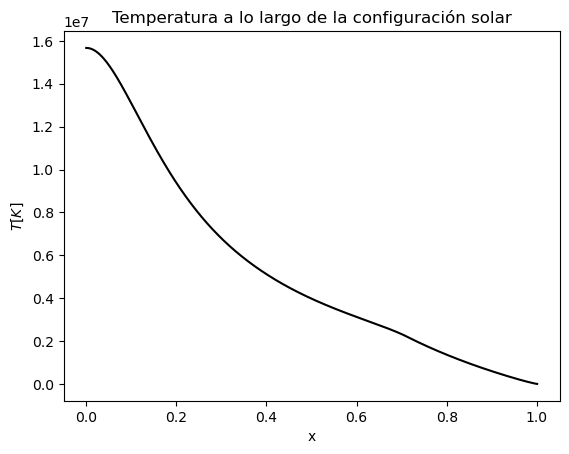

In [15]:
plt.plot(rR,T,color="black")
plt.xlabel(r'x')
plt.ylabel(r'$T[K]$')
plt.title('Temperatura a lo largo de la configuración solar')
plt.show()

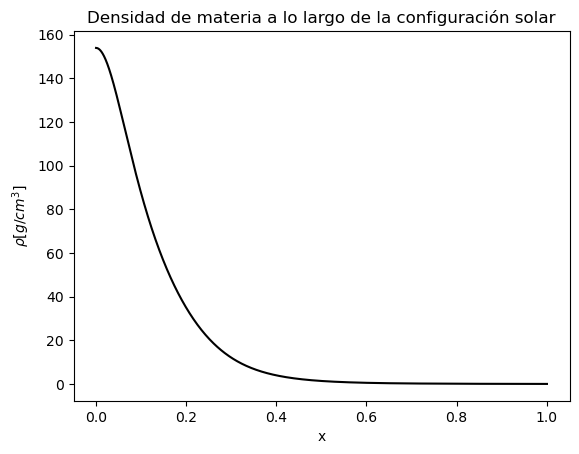

In [16]:
plt.plot(rR,rho,color="black")
plt.xlabel(r'x')
plt.ylabel(r'$\rho[g/cm^3]$')
plt.title('Densidad de materia a lo largo de la configuración solar')
plt.show()

In [17]:
K = np.zeros(n)
for j in range(n):
    K[j] = p[j]/(rho[j]**gamma1[j])

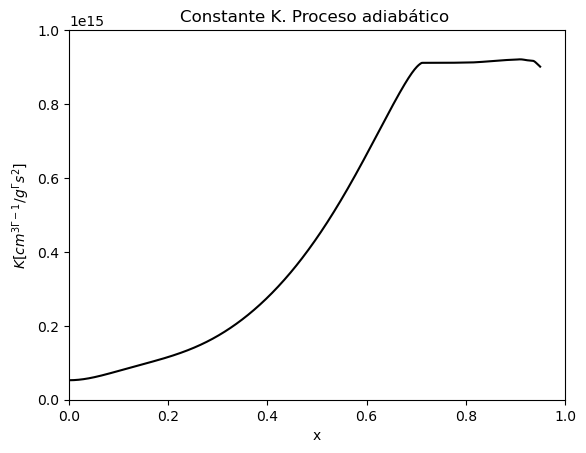

In [18]:
plt.plot(rR[0:1494],K[0:1494],color="black")
plt.xlabel(r'x')
plt.ylabel(r'$K[cm^{3\Gamma-1}/g^\Gamma s^2]$')
plt.title('Constante K. Proceso adiabático ')
plt.axis([0, 1, 0, 10e14])
plt.show()

In [19]:
mr = np.zeros(n)
integrando2 = np.zeros(n)
for j in range(n):
    integrando2[j] = (4*np.pi*(Rsol**3))*(rR[j]**2)*rho[j]

for k in range(n):
    mr[k] = integrate.trapezoid(integrando2[0:k], x=rR[0:k])

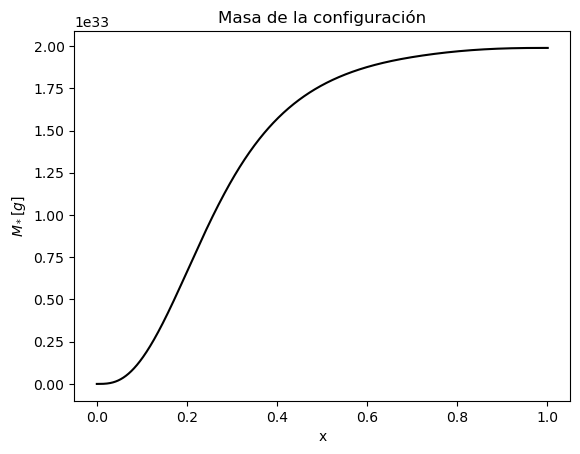

In [20]:
plt.plot(rR,mr,color="black")
plt.xlabel(r'x')
plt.ylabel(r'$M_*[g]$')
plt.title('Masa de la configuración')
plt.show()

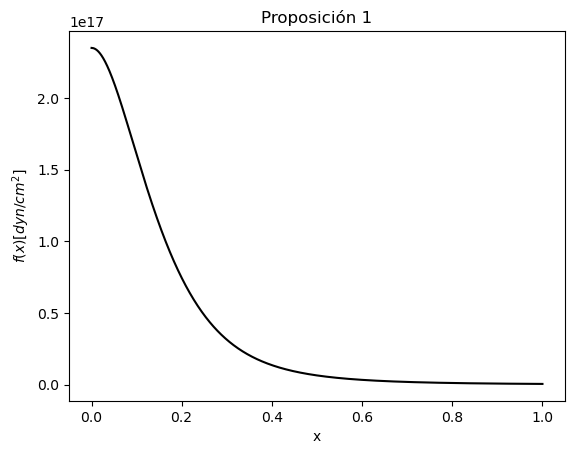

In [21]:
pr1 = np.zeros(n)
for i1 in range(1,n):
    pr1[i1] = p[i1] + ((G*mr[i1]**2)/(8*(Rsol**4)*np.pi*rR[i1]**4))
pr1[0] = p[0] + (2*np.pi*G*(rR[0]*Rsol)**2*rho[0])/(9)
pr1[1] = p[1] + (2*np.pi*G*(rR[1]*Rsol)**2*rho[1])/(9)

plt.plot(rR,pr1,color="black")
plt.xlabel(r'x')
plt.ylabel(r'$f(x)[dyn/cm^2]$')
plt.title('Proposición 1')
plt.show()

In [22]:
def Inu(p, rR, nu, n, Rsol):
    integrando = np.zeros(n)
    for i in range(n):
        integrando[i] = p[i]*(rR[i]**(3-nu))
    valintegral = integrate.trapezoid(integrando, x=rR)
    return (4*np.pi*(4-nu)*(Rsol**(4-nu))*valintegral)

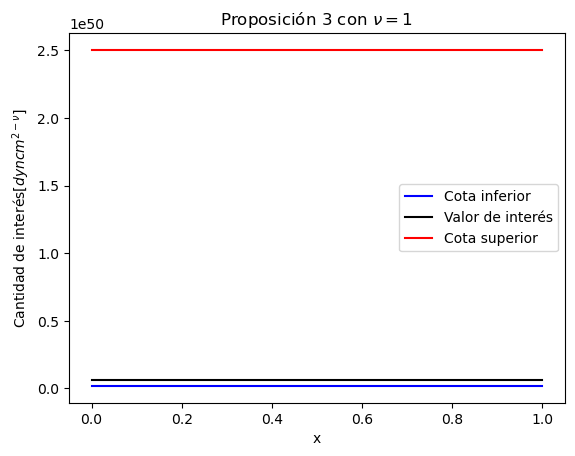

In [23]:
# para nu = 1
nu = 1
cotinf3 = (G*Msol**2)/(2*Rsol**nu)
cotsup3 = (nu*np.pi*p[0]*Rsol**(4-nu)) + ((4-nu)*G*Msol**2)/(8*Rsol**nu)
domrec = [0, 1]
infrec = [cotinf3, cotinf3]
funcrec = [Inu(p,rR, nu, n, Rsol), Inu(p,rR, nu, n, Rsol)]
suprec = [cotsup3, cotsup3]

plt.plot(domrec,infrec,color="blue")
plt.plot(domrec,funcrec,color="black")
plt.plot(domrec,suprec,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Valor de interés', 'Cota superior'])
plt.ylabel(r'Cantidad de interés[$dyn cm^{2-\nu}$]')
plt.title(r'Proposición 3 con $\nu = 1$')
plt.show()

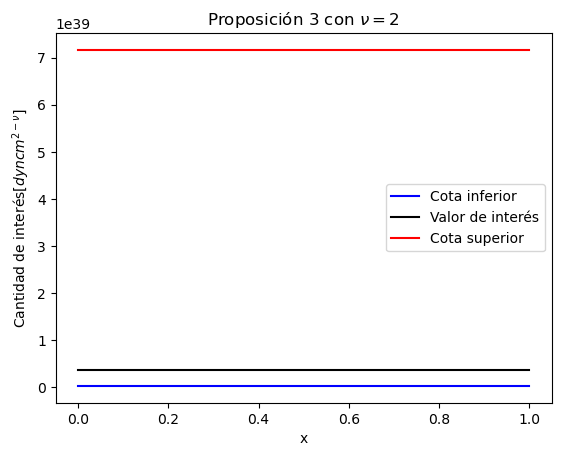

In [24]:
# para nu = 2
nu = 2
cotinf3 = (G*Msol**2)/(2*Rsol**nu)
cotsup3 = (nu*np.pi*p[0]*Rsol**(4-nu)) + ((4-nu)*G*Msol**2)/(8*Rsol**nu)
domrec = [0, 1]
infrec = [cotinf3, cotinf3]
funcrec = [Inu(p,rR, nu, n, Rsol), Inu(p,rR, nu, n, Rsol)]
suprec = [cotsup3, cotsup3]

plt.plot(domrec,infrec,color="blue")
plt.plot(domrec,funcrec,color="black")
plt.plot(domrec,suprec,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Valor de interés', 'Cota superior'])
plt.ylabel(r'Cantidad de interés[$dyn cm^{2-\nu}$]')
plt.title(r'Proposición 3 con $\nu = 2$')
plt.show()

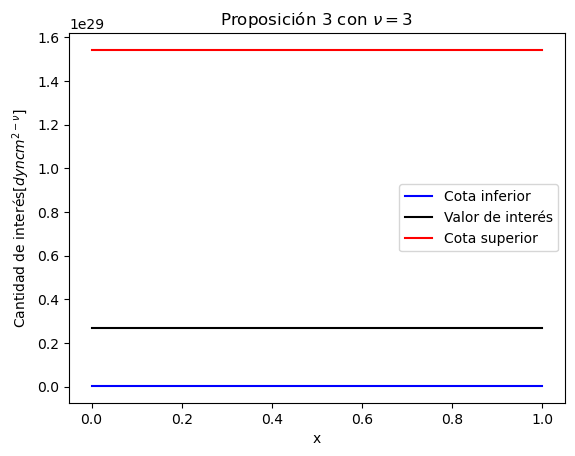

In [25]:
# para nu = 3
nu = 3
cotinf3 = (G*Msol**2)/(2*Rsol**nu)
cotsup3 = (nu*np.pi*p[0]*Rsol**(4-nu)) + ((4-nu)*G*Msol**2)/(8*Rsol**nu)
domrec = [0, 1]
infrec = [cotinf3, cotinf3]
funcrec = [Inu(p,rR, nu, n, Rsol), Inu(p,rR, nu, n, Rsol)]
suprec = [cotsup3, cotsup3]

plt.plot(domrec,infrec,color="blue")
plt.plot(domrec,funcrec,color="black")
plt.plot(domrec,suprec,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Valor de interés', 'Cota superior'])
plt.ylabel(r'Cantidad de interés[$dyn cm^{2-\nu}$]')
plt.title(r'Proposición 3 con $\nu = 3$')
plt.show()

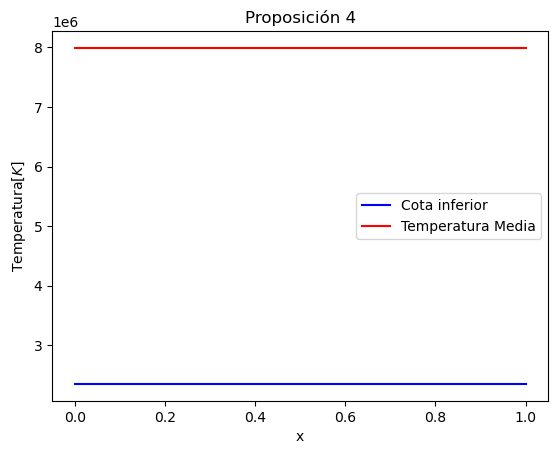

In [26]:
tbar = 0
integrandotbar = np.zeros(n)
cotinf3 = (mu*mH*G*Msol)/(6*kB*Rsol)

for j in range(n):
    integrandotbar[j] = ((4*np.pi*(Rsol**3))*(rR[j]**2)*rho[j]*T[j])/(Msol)
tbar = integrate.trapezoid(integrandotbar, x=rR)

infrec = [cotinf3, cotinf3]
suprec = [tbar, tbar]

plt.plot(domrec,infrec,color="blue")
plt.plot(domrec,suprec,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Temperatura Media'])
plt.ylabel(r'Temperatura[$K$]')
plt.title(r'Proposición 4')
plt.show()

In [27]:
prbar = np.zeros(n)
integrandoprbar = np.zeros(n)
for j in range(2,n):
    integrandoprbar[j] = ((4*np.pi*(Rsol**3))*(rR[j]**2)*rho[j]*p[j])/mr[j]

for k in range(2,n):
    prbar[k] = integrate.trapezoid(integrandoprbar[0:k], x=rR[0:k])

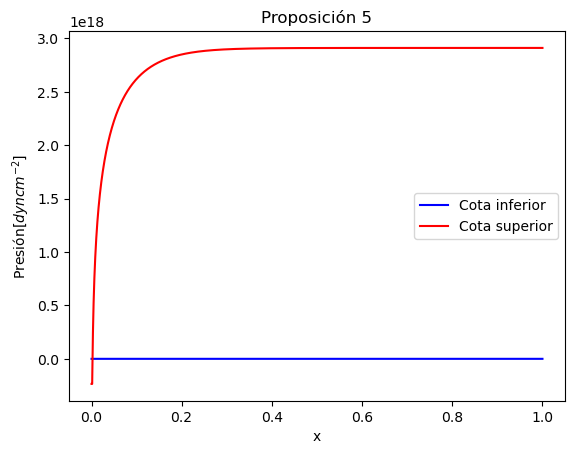

In [28]:
fr5 = np.zeros(n)
for i in range(3,n):
    (G*mr**2)/(12*np.pi*((Rsol*rR[i])**4))

plt.plot(rR,fr5,color="blue")
plt.plot(rR,prbar-p,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Cota superior'])
plt.ylabel(r'Presión[$dyn cm^{-2}$]')
plt.title(r'Proposición 5')
plt.show()

In [29]:
rhorbar = np.ones(n)
for j in range(1,n):
    rhorbar[j] = (3*mr[j])/(4*np.pi*(Rsol*rR[j])**3)

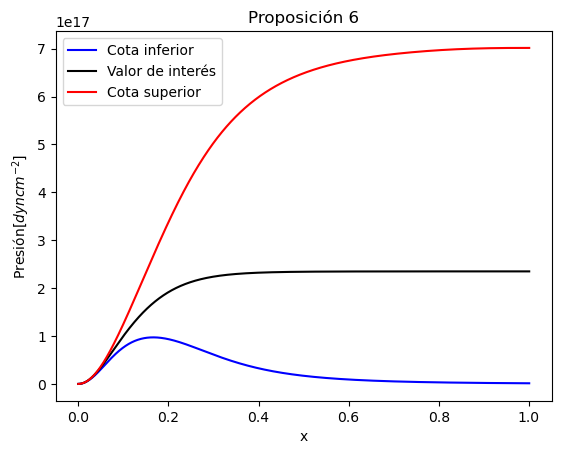

In [30]:
infrec = (1/2)*(4*np.pi/3)**(1/3)*G*rhorbar**(4/3)*mr**(2/3)
suprec = (1/2)*(4*np.pi/3)**(1/3)*G*rho[0]**(4/3)*mr**(2/3)
funcrec = np.ones(n)
for j in range(n):
    funcrec[j] = p[0] - p[j]


plt.plot(rR,infrec,color="blue")
plt.plot(rR,funcrec,color="black")
plt.plot(rR,suprec,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Valor de interés', 'Cota superior'])
plt.ylabel(r'Presión[$dyn cm^{-2}$]')
plt.title(r'Proposición 6')
plt.show()

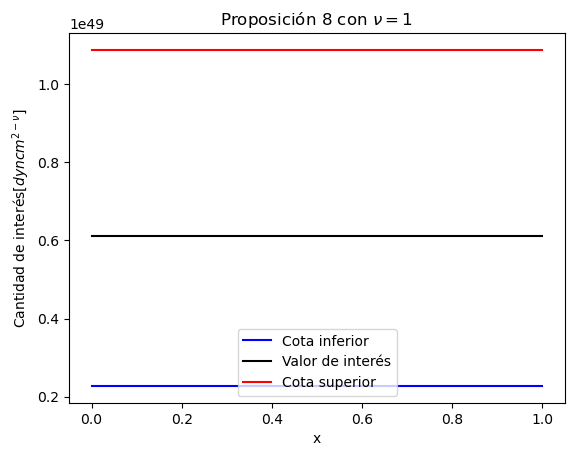

In [31]:
rc = ((3*Msol)/(4*np.pi*rho[0]))**(1/3)

# para nu = 1
nu = 1
cotinf3 = ((G*Msol**2)/(Rsol**nu))*(3/(6-nu))
cotsup3 = ((G*Msol**2)/(rc**nu))*(3/(6-nu))
domrec = [0, 1]
infrec = [cotinf3, cotinf3]
funcrec = [Inu(p,rR, nu, n, Rsol), Inu(p,rR, nu, n, Rsol)]
suprec = [cotsup3, cotsup3]

plt.plot(domrec,infrec,color="blue")
plt.plot(domrec,funcrec,color="black")
plt.plot(domrec,suprec,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Valor de interés', 'Cota superior'])
plt.ylabel(r'Cantidad de interés[$dyn cm^{2-\nu}$]')
plt.title(r'Proposición 8 con $\nu = 1$')
plt.show()

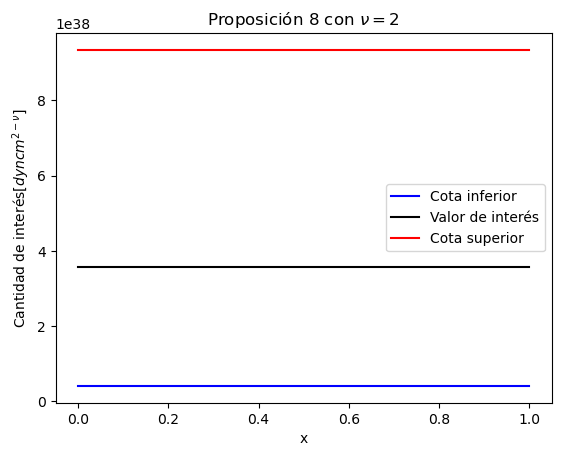

In [32]:
# para nu = 2
nu = 2
cotinf3 = ((G*Msol**2)/(Rsol**nu))*(3/(6-nu))
cotsup3 = ((G*Msol**2)/(rc**nu))*(3/(6-nu))
domrec = [0, 1]
infrec = [cotinf3, cotinf3]
funcrec = [Inu(p,rR, nu, n, Rsol), Inu(p,rR, nu, n, Rsol)]
suprec = [cotsup3, cotsup3]

plt.plot(domrec,infrec,color="blue")
plt.plot(domrec,funcrec,color="black")
plt.plot(domrec,suprec,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Valor de interés', 'Cota superior'])
plt.ylabel(r'Cantidad de interés[$dyn cm^{2-\nu}$]')
plt.title(r'Proposición 8 con $\nu = 2$')
plt.show()

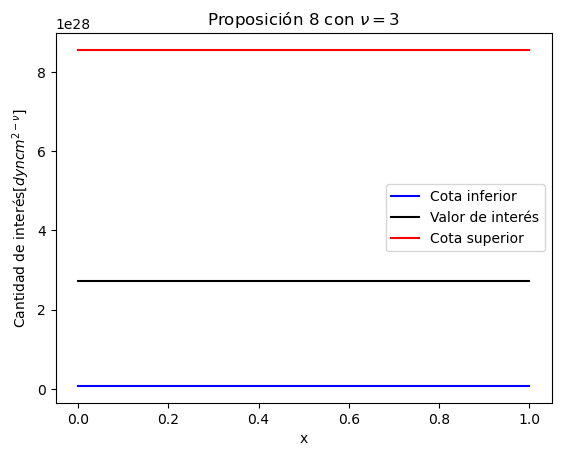

In [33]:
# para nu = 3
nu = 3
cotinf3 = ((G*Msol**2)/(Rsol**nu))*(3/(6-nu))
cotsup3 = ((G*Msol**2)/(rc**nu))*(3/(6-nu))
domrec = [0, 1]
infrec = [cotinf3, cotinf3]
funcrec = [Inu(p,rR, nu, n, Rsol), Inu(p,rR, nu, n, Rsol)]
suprec = [cotsup3, cotsup3]

plt.plot(domrec,infrec,color="blue")
plt.plot(domrec,funcrec,color="black")
plt.plot(domrec,suprec,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Valor de interés', 'Cota superior'])
plt.ylabel(r'Cantidad de interés[$dyn cm^{2-\nu}$]')
plt.title(r'Proposición 8 con $\nu = 3$')
plt.show()

In [34]:
def Inu8(mr, rR, rho, nu, n, Rsol, G):
    integrando = np.zeros(n)
    for i in range(3,n):
        integrando[i] = 4*np.pi*G*(Rsol**(3-nu))*(rR[i]**(2-nu))*rho[i]*mr[i]
    valintegral = integrate.trapezoid(integrando, x=rR)
    return valintegral

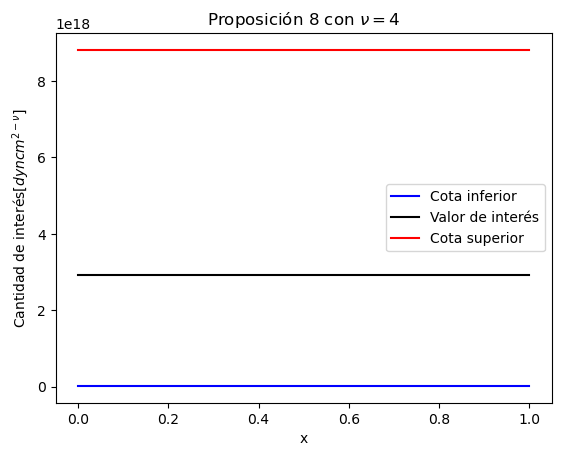

In [35]:
# para nu = 4
nu = 4
cotinf3 = ((G*Msol**2)/(Rsol**nu))*(3/(6-nu))
cotsup3 = ((G*Msol**2)/(rc**nu))*(3/(6-nu))
domrec = [0, 1]
infrec = [cotinf3, cotinf3]
funcrec = [Inu8(mr,rR, rho, nu, n, Rsol, G), Inu8(mr,rR, rho, nu, n, Rsol, G)]
suprec = [cotsup3, cotsup3]

plt.plot(domrec,infrec,color="blue")
plt.plot(domrec,funcrec,color="black")
plt.plot(domrec,suprec,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Valor de interés', 'Cota superior'])
plt.ylabel(r'Cantidad de interés[$dyn cm^{2-\nu}$]')
plt.title(r'Proposición 8 con $\nu = 4$')
plt.show()

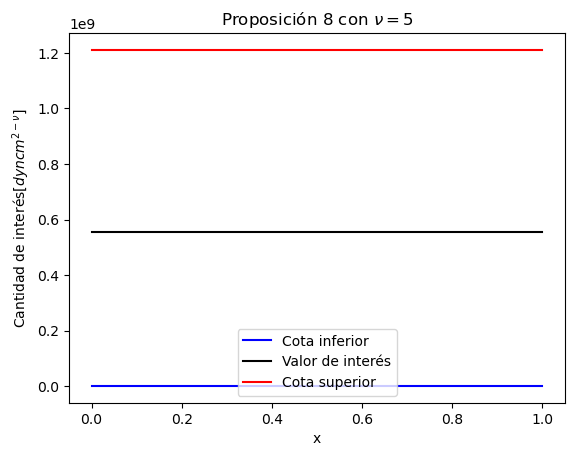

In [36]:
# para nu = 5
nu = 5
cotinf3 = ((G*Msol**2)/(Rsol**nu))*(3/(6-nu))
cotsup3 = ((G*Msol**2)/(rc**nu))*(3/(6-nu))
domrec = [0, 1]
infrec = [cotinf3, cotinf3]
funcrec = [Inu8(mr,rR, rho, nu, n, Rsol, G), Inu8(mr,rR, rho, nu, n, Rsol, G)]
suprec = [cotsup3, cotsup3]

plt.plot(domrec,infrec,color="blue")
plt.plot(domrec,funcrec,color="black")
plt.plot(domrec,suprec,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Valor de interés', 'Cota superior'])
plt.ylabel(r'Cantidad de interés[$dyn cm^{2-\nu}$]')
plt.title(r'Proposición 8 con $\nu = 5$')
plt.show()

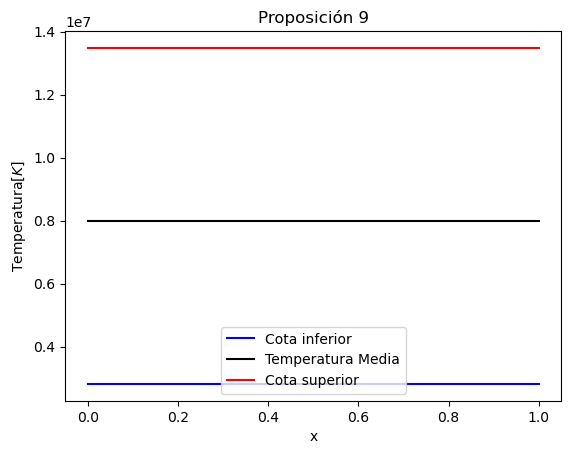

In [37]:
cotinf9 = (mu*mH*G*Msol)/(5*kB*Rsol)
cotsup9 = (mu*mH*G*Msol)/(5*kB*rc)
domrec = [0, 1]
infrec = [cotinf9, cotinf9]
funcrec = [tbar, tbar]
suprec = [cotsup9, cotsup9]

plt.plot(domrec,infrec,color="blue")
plt.plot(domrec,funcrec,color="black")
plt.plot(domrec,suprec,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Temperatura Media', 'Cota superior'])
plt.ylabel(r'Temperatura[$K$]')
plt.title(r'Proposición 9')
plt.show()

In [38]:
def Inu10(mr, rR, rho, nu, sigma, n, Rsol, G):
    integrando = np.zeros(n)
    for i in range(3,n):
        integrando[i] = 4*np.pi*G*(Rsol**(3-nu))*(rR[i]**(2-nu))*rho[i]*(mr[i]**sigma)
    valintegral = integrate.trapezoid(integrando, x=rR)
    return valintegral

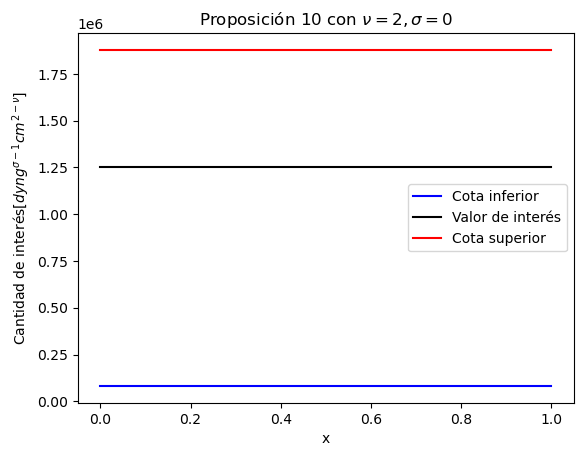

In [39]:
# para nu = 2, sigma = 0
nu, sigma = 2, 0
cotinf3 = (3*G*(Msol**(sigma+1)))/(((3*sigma)+3-nu)*(Rsol**nu))
cotsup3 = (3*G*(Msol**(sigma+1)))/(((3*sigma)+3-nu)*(rc**nu))
domrec = [0, 1]
infrec = [cotinf3, cotinf3]
funcrec = [Inu10(mr, rR, rho, nu, sigma, n, Rsol, G), Inu10(mr, rR, rho, nu, sigma, n, Rsol, G)]
suprec = [cotsup3, cotsup3]

plt.plot(domrec,infrec,color="blue")
plt.plot(domrec,funcrec,color="black")
plt.plot(domrec,suprec,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Valor de interés', 'Cota superior'])
plt.ylabel(r'Cantidad de interés[$dyn g^{\sigma-1} cm^{2-\nu}$]')
plt.title(r'Proposición 10 con $\nu = 2, \sigma = 0$')
plt.show()

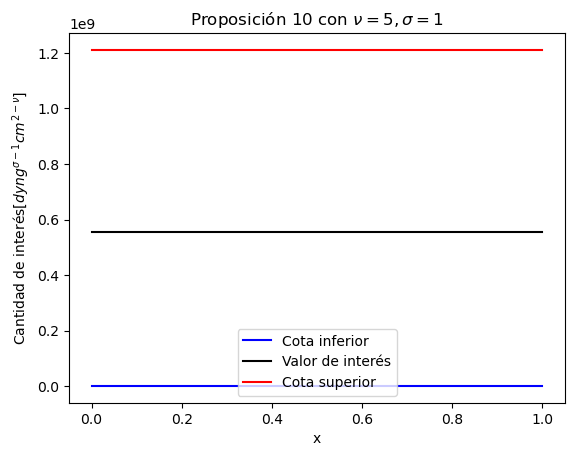

In [40]:
# para nu = 5, sigma = 1
nu, sigma = 5, 1
cotinf3 = (3*G*(Msol**(sigma+1)))/(((3*sigma)+3-nu)*(Rsol**nu))
cotsup3 = (3*G*(Msol**(sigma+1)))/(((3*sigma)+3-nu)*(rc**nu))
domrec = [0, 1]
infrec = [cotinf3, cotinf3]
funcrec = [Inu10(mr, rR, rho, nu, sigma, n, Rsol, G), Inu10(mr, rR, rho, nu, sigma, n, Rsol, G)]
suprec = [cotsup3, cotsup3]

plt.plot(domrec,infrec,color="blue")
plt.plot(domrec,funcrec,color="black")
plt.plot(domrec,suprec,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Valor de interés', 'Cota superior'])
plt.ylabel(r'Cantidad de interés[$dyn g^{\sigma-1} cm^{2-\nu}$]')
plt.title(r'Proposición 10 con $\nu = 5, \sigma = 1$')
plt.show()

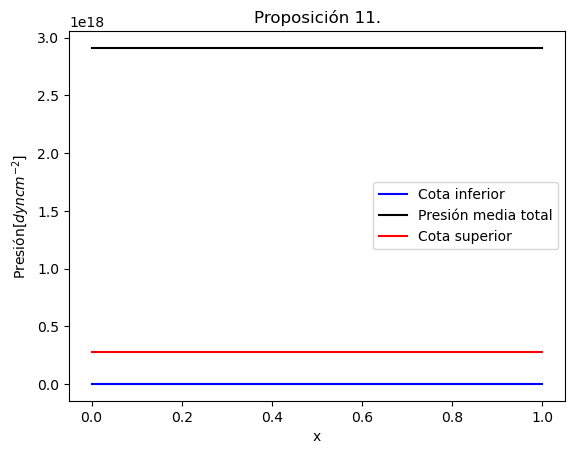

In [41]:
cotinf11 = ((G*Msol**2)/(Rsol**4))*(3/(20*np.pi))
pmediot = prbar[len(prbar)-1]
cotsup11 = ((G*Msol**2)/(rc**4))*(3/(20*np.pi))
domrec = [0, 1]
infrec = [cotinf11, cotinf11]
funcrec = [pmediot, pmediot]
suprec = [cotsup11, cotsup11]

plt.plot(domrec,infrec,color="blue")
plt.plot(domrec,funcrec,color="black")
plt.plot(domrec,suprec,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Presión media total', 'Cota superior'])
plt.ylabel(r'Presión[$dyn cm^{-2}$]')
plt.title(r'Proposición 11.')
plt.show()

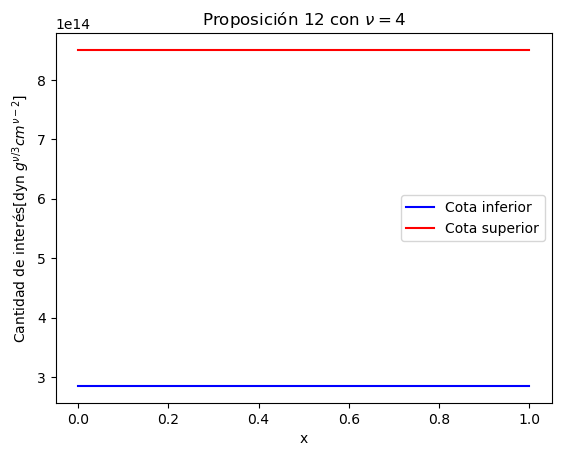

In [42]:
# para nu = 4
nu = 4

cotinf11 = p[0]/(rho[0]**(nu/3))
cotsup11 = (1/(6-nu))*((4*np.pi)/3)**((nu/3)-1)*(G*(Rsol**(nu-4))*(Msol**(2-(nu/3))))

infrec = [cotinf11, cotinf11]
suprec = [cotsup11, cotsup11]

plt.plot(domrec,infrec,color="blue")
plt.plot(domrec,suprec,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Cota superior'])
plt.ylabel(r'Cantidad de interés[dyn $g^{\nu/3} cm^{\nu-2}$]')
plt.title(r'Proposición 12 con $\nu = 4$')
plt.show()

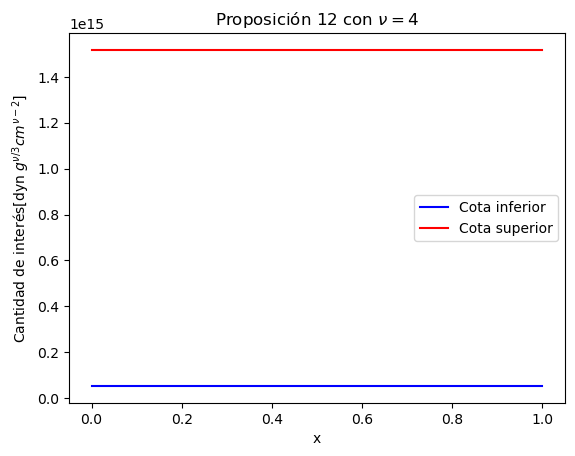

In [43]:
# para nu = 5
nu = 5

cotinf11 = p[0]/(rho[0]**(nu/3))
cotsup11 = (1/(6-nu))*((4*np.pi)/3)**((nu/3)-1)*(G*(Rsol**(nu-4))*(Msol**(2-(nu/3))))

infrec = [cotinf11, cotinf11]
suprec = [cotsup11, cotsup11]

plt.plot(domrec,infrec,color="blue")
plt.plot(domrec,suprec,color="red")
plt.xlabel(r'x')
plt.legend(['Cota inferior', 'Cota superior'])
plt.ylabel(r'Cantidad de interés[dyn $g^{\nu/3} cm^{\nu-2}$]')
plt.title(r'Proposición 12 con $\nu = 4$')
plt.show()

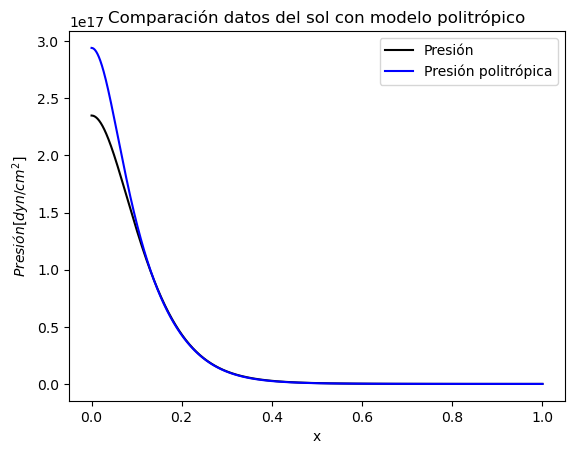

In [44]:
K = 421.8271e12
Gamma = 1.3
f = np.zeros(n)
for i in range(n):
    f[i] = K*rho[i]**Gamma
plt.plot(rR,p,color="black", label='Presión')
plt.plot(rR,f,color="blue", label='Presión politrópica')
plt.legend(loc='best')
plt.xlabel(r'x')
plt.ylabel(r'$Presión[dyn/cm^2]$')
plt.title('Comparación datos del sol con modelo politrópico')
plt.show()
